# CA ASTRO - Data Science and ML Workshop

**Author** : Victor Calderon

**Date** : 13th and 14th of June, 2020

## Intro to Machine Learning (ML)

In this notebook, we will
- discuss some of the main topics about machine learning
- create a simple ML model using out-of-the-box datasets
- evaluate the performance of the model

### Types of Machine Learning

The are of `machine learning` is very vast and it is comprised of **many** different
subcategories of ML models / algorithms, as it's nicely represented in the following
figure:

![ML_usages](./images/Data_Science_Diagram.png)
<small>Image source: ([http://www.cognub.com/index.php/cognitive-platform/](http://www.cognub.com/index.php/cognitive-platform/))</small> and
<small>article [link](https://towardsdatascience.com/coding-deep-learning-for-beginners-types-of-machine-learning-b9e651e1ed9d)</small>

There are typically 3 main different types of ML algorithms:

- Supervised Learning
- Unsupervised Learning
- Reinforcement Learning

#### Supervised Learning

This type of algorithm consists of a target which is to be predicted given a set of *predictors* (or features), which are
independent from the `target` variable. Using these variables, one can create a **mapping** between the different
**features** and the **target variable**.

This is the same as

$$y = f(\textrm{features})$$

The algorithm / model undergoes a **training** process, in which the model *learns* the functional form of *f* as a function
of the features, and it tries to predict $y$ based on this mapping.

Supervised learning can be broken into 2 main branches:

1. **Classification**: Model is trained to *classify* something into certain classes
    - Examples:
        - Clasifying whether a patient has a certain disease or not
        - Classify between elliptical and spiral galaxies
        - Determine types of stars (*OBAFGKM*)

2. **Regression**: A model is trained to *predict* some value like prices, weight, number of surgeries, etc.
    - Examples:
        - Predicting stock prices based on historical data
        - Predict how much a car will cost in 2, 3, or 4 years from now, based on its model and specifications.
        - Estimate the mass of the dark matter halo based on galaxy- and group-related properties ($M_{\odot}$, color, velocity, etc.)

#### Unsupervised Learning

This type of algorithm consists of using different *features* to determine a **class**, to which an object belongs. Using this
algorithm, we do not have any target variables or outcome variable to predict.

Unsupervised learning can be split into two categories:

- **Clustering**: A clustering scenario is where you want to determine the groupings in a given dataset
    - Examples
        - Grouping customers into those who buy a lot and do not spend much
        - Recommended Systems (Netflix, Amazon, etc.)
        - Cluster different books o the bases of topics and information

- **Association**: An association rule learning scenario (not that common) is where one wants to discover the underlying rules governing large portions of the dataset.
    - Examples:
        - If `Person A` buys item `X`, they also tend to buy item `Y`.
      

#### Reinforcement Learning

Using this type of algorithm, the model is trained to make specific decisions after *learning* from its *environment*.
The model is first exposed to a *training environment*, in which it learns to make the correct decision by trial and error.

An example taken from [Analytics Vidhya](https://www.analyticsvidhya.com/blog/2017/01/introduction-to-reinforcement-learning-implementation/)
considers Reinforcement Learning as when a child is learning how to walk:

1. The first thing the child will observe is to **notice** how you are walking. You use two legs, taking a step at a time in order to walk. Grasping this concept, the child tries to replicate you.
2. But soon he/she will understand that before walking, the child has to stand up! This is a challenge that comes along while trying to walk. So now the child **attempts to get up**, staggering and slipping but still determinant to get up.

3. Then there’s another challenge to cope up with. Standing up was easy, but to **remain still** is another task altogether! Clutching thin air to find support, the child manages to stay standing.

4. Now the real task for the child is to start walking. But it’s easy to say than actually do it. There are so **many things to keep in mind**, like balancing the body weight, deciding which foot to put next and where to put it.

---

## Examples of using ML Learning using Scikit-Learn

There are several useful libraries in Python that provide a solid implementation of machine learning algorithms.
Possibly, the most famous one is [Scikit-Learn](https://scikit-learn.org/stable/), a package that provides
efficient and user-friendly version of the most common ML algorithms, including but not limited to

- Random Forest
- Logistic Regression
- Principal Component Analysis (PCA)
- TSNE (another clustering algorithm)
- and many more.

This library contains very useful tools for examine datasets, create and evaluate ML models, and more.

### Example: Iris dataset

Possibly the most well-known example of machine learning is that of classifying plants (iris) based on different features, such as
sepal's width and height and those of the petals.

Let's try to first evaluate this dataset and then come up with a very simple model.

In [22]:
# Importing modules
%matplotlib inline
%load_ext lab_black

import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import seaborn as sns

rc("text", usetex=False)

sns.set()

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [15]:
# Loading in the iris dataset
iris = sns.load_dataset("iris")

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Now let's check some statistics about this dataset

In [16]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [17]:
# This gives a better picture of the data types and size of the DataFrame
iris.info("all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Let's now visualize this dataset as a `pairplot` using `Seaborn`, and separate it by the different types of irises:

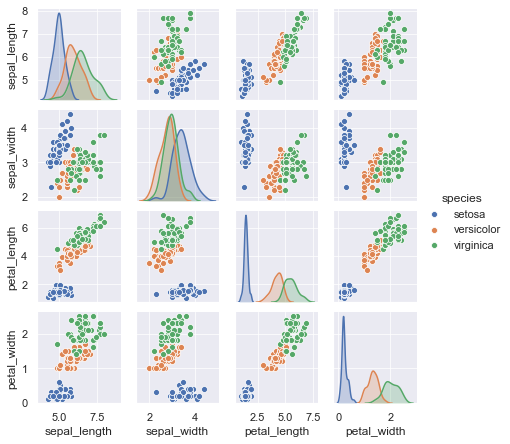

In [20]:
sns.pairplot(iris, hue="species", height=1.5)

Judging from this figure, the three species (`setosa`, `versicolor`, and `virginica`) form distinct groups
when plotting one *feature* against other features.

Let's look at the distribution of the different *features* for each type of iris. To simplify this,
we can modify the dataset to simplify this process with the help of the function `pandas.melt`

In [28]:
iris_melt = pd.melt(iris, id_vars=["species"], var_name="iris_type", value_name="value")

iris_melt.head()

,species,iris_type,value
0,setosa,sepal_length,5.1
1,setosa,sepal_length,4.9
2,setosa,sepal_length,4.7
3,setosa,sepal_length,4.6
4,setosa,sepal_length,5.0


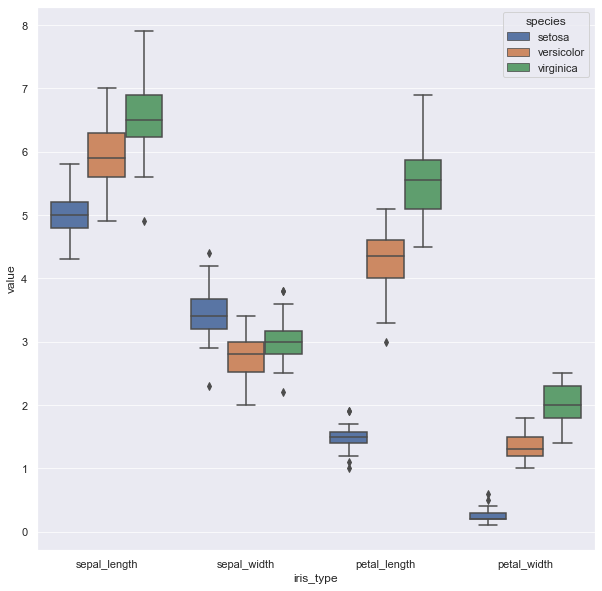

In [33]:
plt.figure(figsize=(10, 10))
sns.boxplot(x="iris_type", y="value", hue="species", data=iris_melt)

#### Let's create a ML models with the `Iris` dataset

The next step is to develop a ML model for classifying diffrent irises based on the sepal's and petal's width and height.
The approach that we will take is:

1. Create a training and testing datasets. Usually, it's a 80-20 proportion.
2. Train a ML model on the training dataset
3. Compute the performance of the model using the *testing* dataset.

In [52]:
# Importing scikit-learn modules
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier

We will use the `species` as the **target** variable, and the rest of columns as the **features**

In [44]:
# Separating target and feature arrays
X = iris[[xx for xx in iris.columns if xx != "species"]].values
y = iris["species"].values

In [45]:
# Features
X[0:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [47]:
# Target Variable
y[0:10]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa'], dtype=object)

##### Training and Testing datasets

In [51]:
# Separating between training and testing X's and y's
X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=0.2, random_state=100
)

print("`X_train`: {0}".format(X_train.shape))
print("`Y_train`: {0}".format(Y_train.shape))
print("`X_test`: {0}".format(X_test.shape))
print("`Y_test`: {0}".format(Y_test.shape))

`X_train`: (120, 4)
`Y_train`: (120,)
`X_test`: (30, 4)
`Y_test`: (30,)


##### Defining ML model

We will use a Random Forest Classifier model:

In [55]:
model = RandomForestClassifier(random_state=9)

In [57]:
# Fitting to training datasets
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=9)

##### Model performance

In [58]:
# Scoring on Test data
y_pred = model.predict(X_test)

We can test this using a confusion matrix

In [59]:
confusion_matrix(Y_test, y_pred)

array([[11,  0,  0],
       [ 0,  5,  1],
       [ 0,  0, 13]])